# Test agent based simulations

In [157]:
include("AgentBasedSimulations.jl")
include("AgeStructuredModels.jl")
include("DemographicParameters.jl")
include("AgeTraitStructuredModels.jl")
include("StockRecruitCurves.jl")
using Plots
theme(:wong2)

# initialize demographic model - paramters loaded from DemographicParameters.jl 
# see tests in "TestDemographicParametersparams.ipynb"
mod = AgeStructuredModels.init(150,DemographicParameters.Smyth_2016_sr,DemographicParameters.Smyth_2016_survival,
    DemographicParameters.Smyth_16_F_vec)

Rstar = AgeStructuredModels.compute_Rstar(mod)
k = 3.0


# set base genetic paramters
Vle = 1.0
θ = 0.0
s = 0.1
min = -5
max = 20 
Δz = 0.15

# set base paramters for propogated individuals 
μ_im = 5.0
R_im = 0.5 * Rstar  # 50% natrual recrutment 

# initialize coupled genetic-demogrpahic model 
pop = AgeTraitStructuredModels.init(mod,Vle, θ, s, min, max, Δz)
StockRecruitCurves.update_BevetonHolt_k!(pop.ageStructure.SRCurve, k)


3.0

# Initialize populations 
### Allow to develop local adaptations

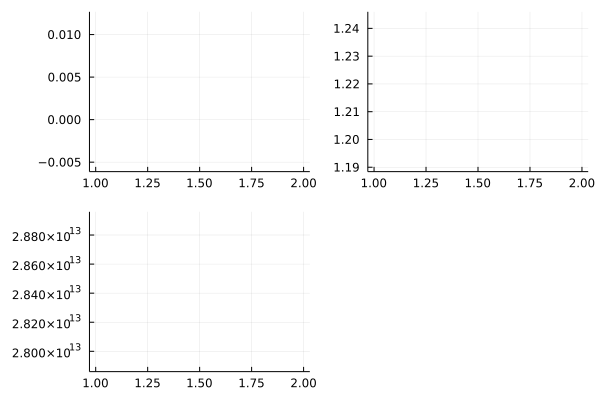

In [178]:
include("AgentBasedSimulations.jl")
pop1 = AgentBasedSimulations.init_population(mod,0.05,2.5,2,25)
T =1
mu = zeros(T)
sigma = zeros(T)
SSB = zeros(T)
for i in 1:T
    AgentBasedSimulations.time_step!(pop1, false)
    SSB[i] = AgentBasedSimulations.SSB(pop1)
    mu[i], sigma[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
end 

p1 = Plots.plot(mu, legend = false)
p2 = Plots.plot(sigma, legend = false)
p3 = Plots.plot(SSB, legend = false)


pop2 = AgentBasedSimulations.init_population(mod,0.05,-2.5,2,25)
mu = zeros(T)
sigma = zeros(T)
SSB = zeros(T)
for i in 1:T
    AgentBasedSimulations.time_step!(pop2, false)
    SSB[i] = AgentBasedSimulations.SSB(pop2)
    mu[i], sigma[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
end 

Plots.plot!(p1,mu, legend = false)
Plots.plot!(p2,sigma, legend = false)
Plots.plot!(p3,SSB, legend = false)

plot(p1,p2,p3)

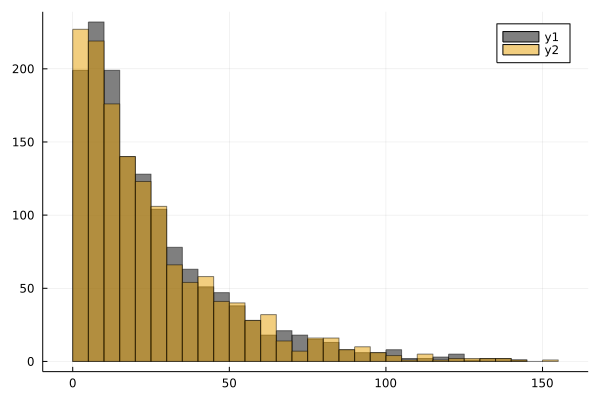

In [152]:
Plots.histogram(AgentBasedSimulations.age_distribution(pop1),alpha = 0.5)
Plots.histogram!(AgentBasedSimulations.age_distribution(pop2),alpha = 0.5)

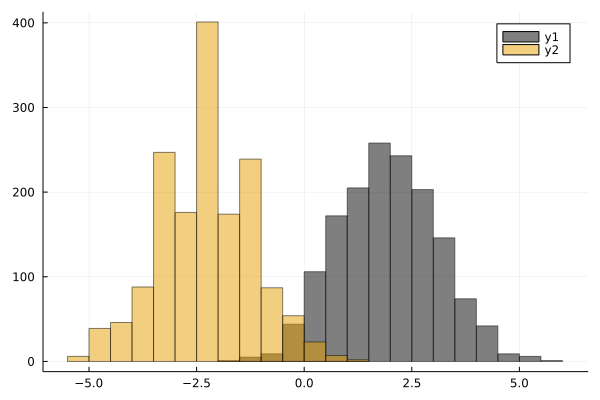

In [110]:
Plots.histogram(AgentBasedSimulations.trait_distribution(pop1),alpha = 0.5)
Plots.histogram!(AgentBasedSimulations.trait_distribution(pop2),alpha = 0.5)

# Simulate joint dynamics 

In [180]:
include("AgentBasedSimulations.jl")
T =100
mu1 = zeros(T)
sigma1 = zeros(T)
SSB1 = zeros(T)
mu2 = zeros(T)
sigma2 = zeros(T)
SSB2 = zeros(T)
for i in 1:T
    AgentBasedSimulations.time_step!(pop1, pop2, 0.01, 0.3)
    SSB1[i] = AgentBasedSimulations.SSB(pop1)
    mu1[i], sigma1[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
    SSB2[i] = AgentBasedSimulations.SSB(pop2)
    mu2[i], sigma2[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
end 


p1 = Plots.plot(mu1, legend = false)
p2 = Plots.plot(sigma1, legend = false)
p3 = Plots.plot(SSB1, legend = false)



Plots.plot!(p1,mu2, legend = false)
Plots.plot!(p2,sigma2, legend = false)
Plots.plot!(p3,SSB2, legend = false)

plot(p1,p2,p3)

149 149
150 150
130 130
131 131
132 132
133 133


134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
149 149
150 150
148 148
149 149
150 150
147 147
148 148
149 149
150 150
148 148
149 149
150 150
148 148
149 149
150 150
132 132
133 133
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
145 145
146 146
147 147
148 148
149 149
150 150
147 147
148 148
149 149
150 150
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
149 149


LoadError: BoundsError: attempt to access 150-element Vector{Float64} at index [151]